# Multivariate Linear Regression for the Medical Insurance Costs Dataset

The goal of this notebook is to create a linear model for the data in a medical insurance dataset, analyze how well the model fits the data, and draw conclusions about what affects insurance costs the most based on the results. This dataset includes data on insurance charges, age, BMI, sex, region, number of children and smoking status for over 1,300 insurance beneficiaries.  Several linear models are created in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import scipy
from tqdm import tqdm
from numpy import linalg as LA
np.set_printoptions(precision=2, suppress=True)

%matplotlib inline

In [2]:
# read the CSV file
df = pd.read_csv("insurance.csv")

In [3]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## Visualization
The first step to creating a linear model involves graphing the dataset to learn more about its characteristics and to get a basic overview of the relationships among the variables.

### Plot Insurance Charges  by Age
First we will plot the insurance charges by age, and then we will plot by age and the categorical variables of region, smoker status and gender.  When we do so, we can see that there is a linear relationship between age and insurance charges.  However, age isn’t necessarily the only factor as can be seen from the three distinct linear patterns that the data appears to follow.

In [35]:
font = {'size'   : 18}
plt.rc('font', **font)

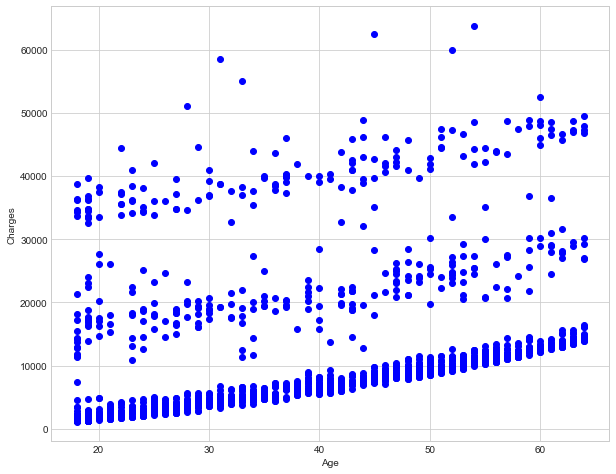

In [8]:
#Plot insurance charges by age only
x = df['age']
y = df['charges']
plt.plot(x, y, 'o', color="blue")
plt.gcf().set_size_inches(10, 8)
#plt.title('Insurance Charges by Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.savefig("Age_1.png") 

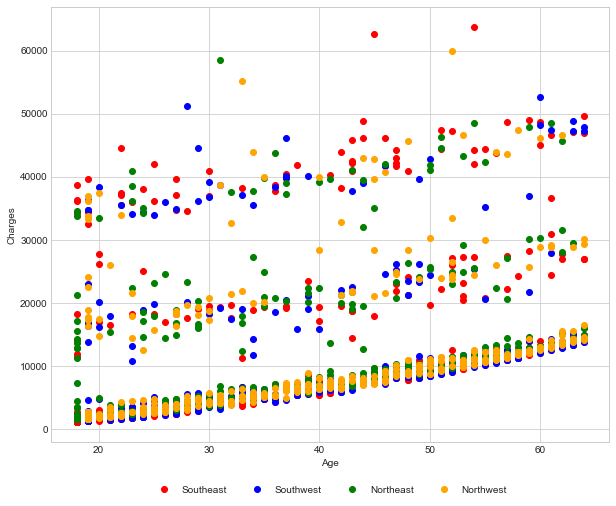

In [9]:
#Plot insurance charges by age and region
plt.style.use('seaborn-whitegrid')
colors = ["red", "blue", "green", "orange"]

sw = df[df.region=='southwest']
se = df[df.region=='southeast']
nw = df[df.region=='northwest']
ne = df[df.region=='northeast']

x1 = se['age']
y1 = se["charges"]
x2 = sw['age']
y2 = sw['charges']
x3 = ne['age']
y3 = ne["charges"]
x4 = nw['age']
y4 = nw['charges']
plt.gcf().set_size_inches(10, 8)

plt.plot(x1, y1, 'o', color=colors[0], label="Southeast")
plt.plot(x2, y2, 'o', color=colors[1], label="Southwest")
plt.plot(x3, y3, 'o', color=colors[2], label="Northeast")
plt.plot(x4, y4, 'o', color=colors[3], label="Northwest")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), 
           ncol=4)

#plt.title('Insurance Charges by Age and Region')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.savefig("Age.png") 

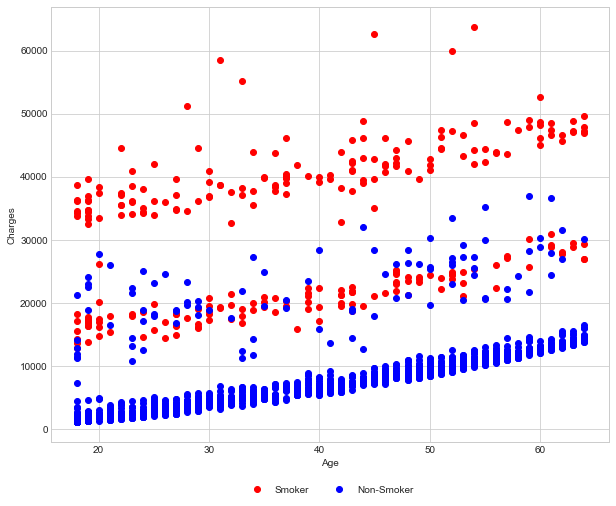

In [10]:
#Plot insurance charges by age and smoking status
plt.style.use('seaborn-whitegrid')
colors = ["red", "blue"]

smoker = df[df.smoker=='yes']
nonsmoker = df[df.smoker=='no']

x1 = smoker['age']
y1 = smoker["charges"]
x2 = nonsmoker['age']
y2 = nonsmoker['charges']

plt.plot(x1, y1, 'o', color=colors[0], label="Smoker")
plt.plot(x2, y2, 'o', color=colors[1], label="Non-Smoker")
plt.gcf().set_size_inches(10, 8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), 
           ncol=2)

#plt.title('Insurance Charges by Age and Smoking Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.savefig("Age_2.png") 

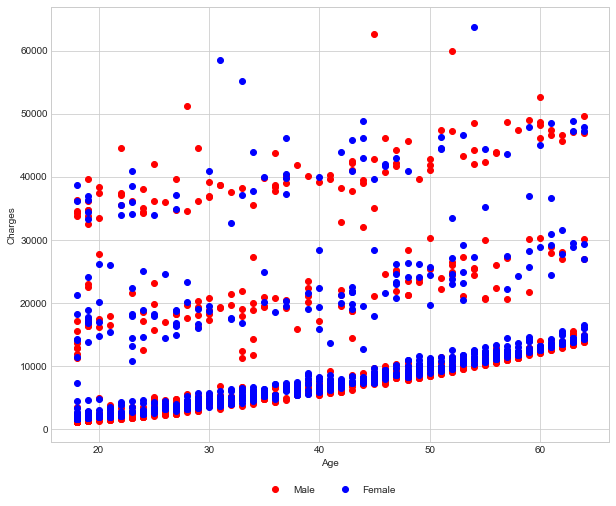

In [11]:
#Plot insurance charges by age and gender
plt.style.use('seaborn-whitegrid')
colors = ["red", "blue"]

male = df[df.sex=='male']
female = df[df.sex=='female']

x1 = male['age']
y1 = male["charges"]
x2 = female['age']
y2 = female['charges']

plt.plot(x1, y1, 'o', color=colors[0], label="Male")
plt.plot(x2, y2, 'o', color=colors[1], label="Female")
plt.gcf().set_size_inches(10, 8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), 
           ncol=2)

#plt.title('Insurance Charges by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.savefig("Age_3.png") 

### Plot Insurance Charges by BMI
Next we plot insurance charges by BMI and then by BMI and the categorical variables.

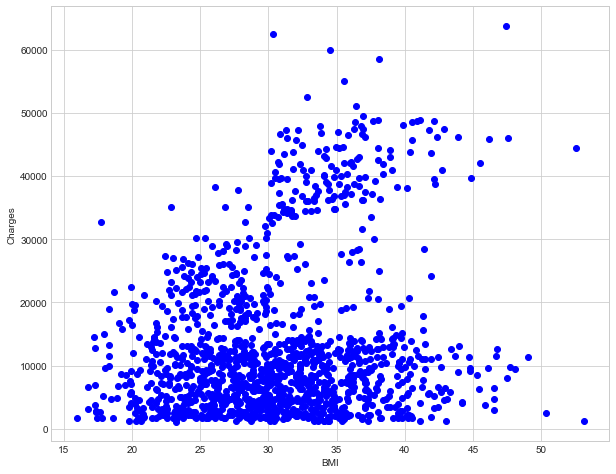

In [12]:
#Plot insurance charges by BMI
x = df['bmi']
y = df['charges']
plt.plot(x, y, 'o', color="blue")
plt.gcf().set_size_inches(10, 8)
#plt.title('Insurance Charges by BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.savefig("BMI_1.png") 

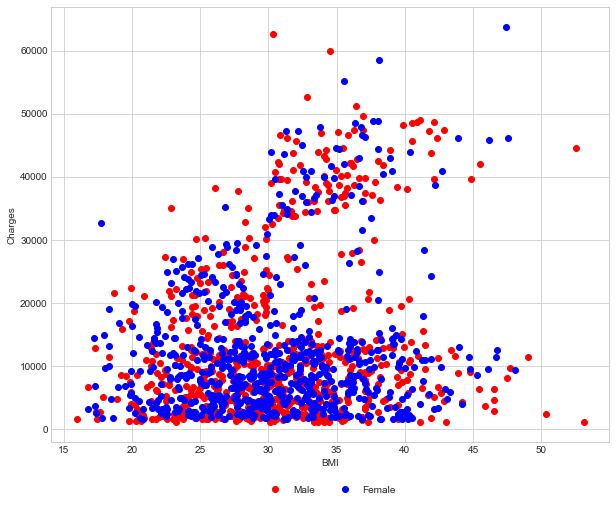

In [13]:
#Plot insurance charges by BMI and gender
x1 = male['bmi']
y1 = male["charges"]
x2 = female['bmi']
y2 = female['charges']


plt.plot(x1, y1, 'o', color=colors[0], label="Male")
plt.plot(x2, y2, 'o', color=colors[1], label="Female")

plt.gcf().set_size_inches(10, 8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), 
           ncol=2)

plt.xlabel('BMI')
plt.ylabel('Charges')
plt.savefig("BMI_1.png") 

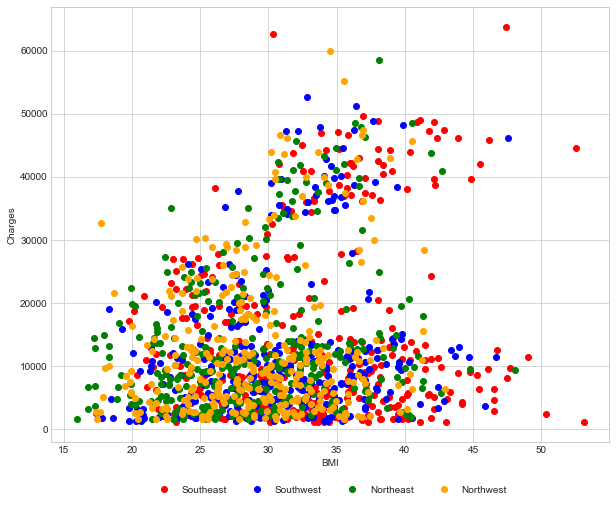

In [14]:
#Plot insurance charges by BMI and region
sw = df[df.region=='southwest']
se = df[df.region=='southeast']
nw = df[df.region=='northwest']
ne = df[df.region=='northeast']
colors = ["red", "blue", "green", "orange"]

x1 = se['bmi']
y1 = se["charges"]
x2 = sw['bmi']
y2 = sw['charges']
x3 = ne['bmi']
y3 = ne["charges"]
x4 = nw['bmi']
y4 = nw['charges']
plt.gcf().set_size_inches(10, 8)

plt.plot(x1, y1, 'o', color=colors[0], label="Southeast")
plt.plot(x2, y2, 'o', color=colors[1], label="Southwest")
plt.plot(x3, y3, 'o', color=colors[2], label="Northeast")
plt.plot(x4, y4, 'o', color=colors[3], label="Northwest")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), 
           ncol=4)

plt.xlabel('BMI')
plt.ylabel('Charges')
plt.savefig("BMI_2.png") 

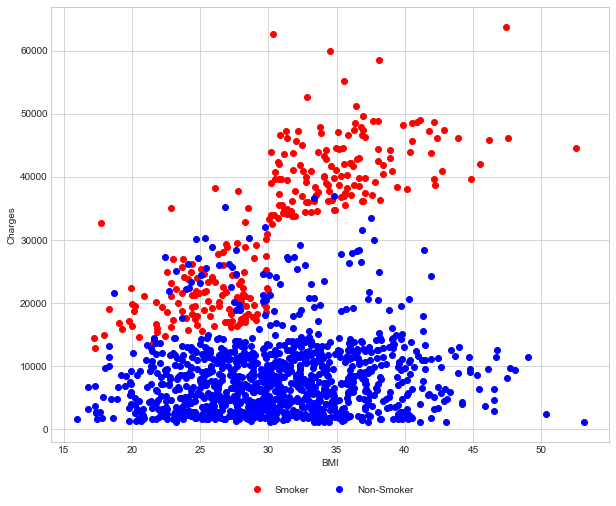

In [15]:
#Plot insurance charges by BMI and smoking status
x1 = smoker['bmi']
y1 = smoker["charges"]
x2 = nonsmoker['bmi']
y2 = nonsmoker['charges']


plt.plot(x1, y1, 'o', color=colors[0], label="Smoker")
plt.plot(x2, y2, 'o', color=colors[1], label="Non-Smoker")

plt.gcf().set_size_inches(10, 8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), 
           ncol=2)

#plt.title('Insurance Charges by BMI and Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.savefig("BMI_1.png") 

### Plot Categorical Variables
The categorical variables were plotted using violin plots

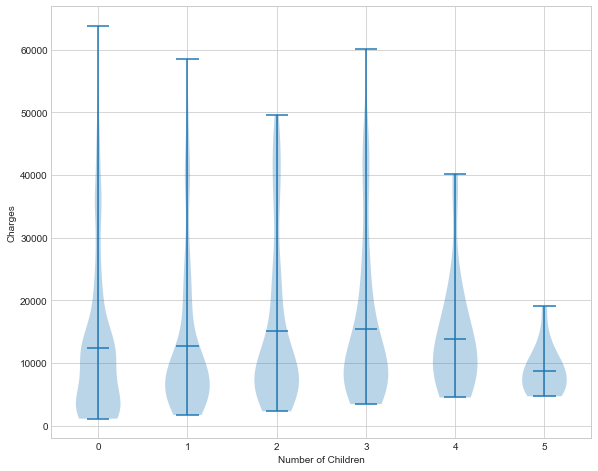

In [16]:
#Plot insurance charges by number of children
num_of_children = np.arange(0,6)
data_to_plot = []

for num in num_of_children:
    data = df[df.children==num]['charges']
    data_to_plot.append(data)

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0.15,0.15,0.75,0.75]) 

# Create the boxplot
bp = ax.violinplot(data_to_plot, showmeans=True)
plt.gcf().set_size_inches(10, 8)
plt.xlabel('Number of Children')
plt.ylabel('Charges')
ax.set_xticks(np.arange(1, 7))
ax.set_xticklabels(num_of_children)
plt.savefig("Children.png") 

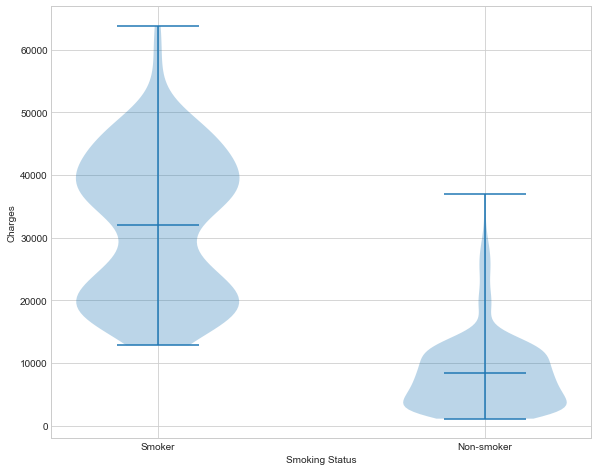

In [17]:
#Plot insurance charges by smoking status
smoker = df[df.smoker=="yes"]["charges"]
nonsmoker = df[df.smoker=="no"]["charges"]


## combine these different collections into a list
data_to_plot = [smoker, nonsmoker]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0.15,0.15,0.75,0.75]) 

# Create the boxplot
bp = ax.violinplot(data_to_plot, showmeans=True)
plt.gcf().set_size_inches(10, 8)
#plt.title('Violin Plot of Insurance Charges for Smokers vs. Non-Smokers')
plt.xlabel('Smoking Status')
plt.ylabel('Charges')
ax.set_xticks(np.arange(1, 3))
ax.set_xticklabels(['Smoker', 'Non-smoker'])
plt.savefig("Smoker.png") 

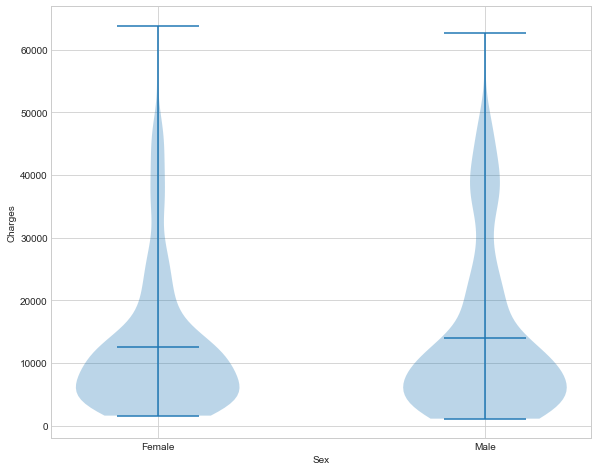

In [18]:
#Plot insurance charges by gender
female = df[df.sex=="female"]["charges"]
male = df[df.sex=="male"]["charges"]


## combine these different collections into a list
data_to_plot = [female, male]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0.15,0.15,0.75,0.75]) 

# Create the boxplot
bp = ax.violinplot(data_to_plot, showmeans=True)
plt.gcf().set_size_inches(10, 8)
#plt.title('Violin Plot of Insurance Charges for Sex')
plt.xlabel('Sex')
plt.ylabel('Charges')
ax.set_xticks(np.arange(1, 3))
ax.set_xticklabels(['Female', 'Male'])
plt.savefig("Sex.png") 

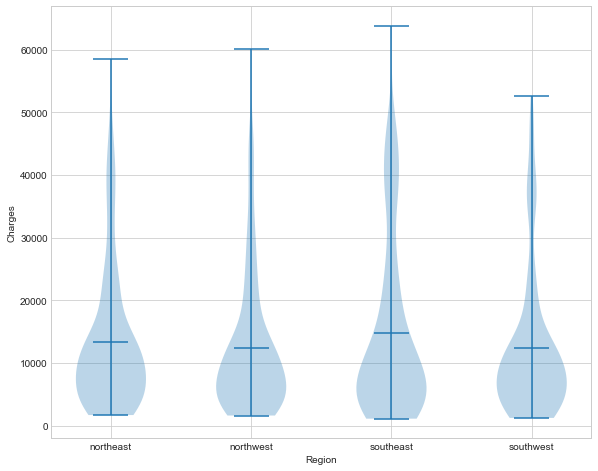

In [19]:
#Plot insurance charges by region
regions = ['northeast', 'northwest', 'southeast', 'southwest']
data_to_plot = []

for region in regions:
    data = df[df.region==region]['charges']
    data_to_plot.append(data)

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0.15,0.15,0.75,0.75]) 

# Create the boxplot
bp = ax.violinplot(data_to_plot, showmeans=True)
plt.gcf().set_size_inches(10, 8)
#plt.title('Violin Plot of Insurance Charges for Region')
plt.xlabel('Region')
plt.ylabel('Charges')
ax.set_xticks(np.arange(1,5))
ax.set_xticklabels(regions)
plt.savefig("Region.png") 

## Prepare Data for Model
There are six variables for the data:  BMI, age, gender, region, number of children, and smoking status.  BMI is a continuous variable, age and number of children are discrete variables, and gender, region and smoking status are categorical variables.  The binary categorical variables (gender, smoking status) are represented by one regressor with either a 0 or 1 value.  The region variable has 4 categories and is represented by a one-hot encoding method using 3 variables.

In [20]:
data = pd.read_csv("insurance.csv")

#Change categorical values into numeric values
data['intercept']=1 
data['sex'].replace(['female', 'male'],[0, 1], inplace=True)
data['smoker'].replace(['yes', 'no'],[1, 0], inplace=True)
data['northeast'] = [1 if x == 'northeast' else 0 for x in data['region']]
data['northwest'] = [1 if x == 'northwest' else 0 for x in data['region']]
data['southeast'] = [1 if x == 'southeast' else 0 for x in data['region']]
#data['region'].replace(['northeast', 'northwest', 'southeast', 'southwest'],[1, 2, 3, 4], inplace=True)
columns_titles = ["intercept", "age", "sex", "bmi", "children", "smoker", "northeast", "northwest", "southeast","charges"]
data=data.reindex(columns=columns_titles)
print(data.head())


   intercept  age  sex     bmi  children  smoker  northeast  northwest  \
0          1   19    0  27.900         0       1          0          0   
1          1   18    1  33.770         1       0          0          0   
2          1   28    1  33.000         3       0          0          0   
3          1   33    1  22.705         0       0          0          1   
4          1   32    1  28.880         0       0          0          1   

   southeast      charges  
0          0  16884.92400  
1          1   1725.55230  
2          1   4449.46200  
3          0  21984.47061  
4          0   3866.85520  


Minimum statistics:
intercept       1.0000
age            18.0000
sex             0.0000
bmi            15.9600
children        0.0000
smoker          0.0000
northeast       0.0000
northwest       0.0000
southeast       0.0000
charges      1121.8739
dtype: float64

Maximum statistics:
intercept        1.00000
age             64.00000
sex              1.00000
bmi             53.13000
children         5.00000
smoker           1.00000
northeast        1.00000
northwest        1.00000
southeast        1.00000
charges      63770.42801
dtype: float64



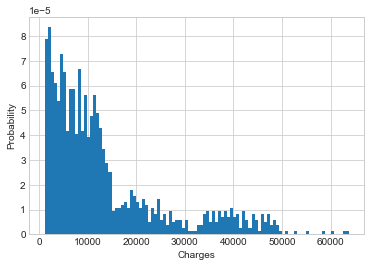

In [23]:
#Statistics on data
print("Minimum statistics:")
print(data.min())
print()
print("Maximum statistics:")
print(data.max())
print()

#plot the density plot of the charges
Y = data['charges'].to_numpy()
plt.hist(Y, density=True, bins=100)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Charges');
plt.savefig("Charges.png") 

## Calculate Parameters for the Full Model
We use a linear model of the form: 
$$y_i=\beta_0+\beta_1x_1+,\ldots,+\beta_nx_n+\epsilon_i$$

$\beta$ is the parameter that is estimated using the following closed-form solution:

$$\hat{\beta}=\left(X^\top X\right)^{-1}X^\top Y$$

$\hat{\beta}$ is an unbiased estimator for $\beta$.


In [25]:
#Convert data to numpy arrays
X = data.to_numpy()
X = X[:,:-1]
print(X.shape)

regressors = list(data.columns)
regressors.pop()
print("Regressors:")
print(regressors)
beta = np.dot(np.dot(LA.inv(np.dot(X.T,X)),X.T),Y.T)
print("Beta Hat:")
print(beta)

(1338, 9)
Regressors:
['intercept', 'age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest', 'southeast']
Beta Hat:
[-12898.59    256.86   -131.31    339.19    475.5   23848.53    960.05
    607.09    -74.97]


### Examine the Residuals
When using the linear model described above, several assumptions are made.  Some of these assumptions are related to the error terms, $\epsilon_i$ and include the normality, independence and constant variance of the error terms.  Since we cannot directly observe the error terms, the residuals $\varepsilon_i$ become a way of mimicking the error terms and observing if these conditions are met.  The residuals $\hat{\varepsilon}$ are calculated as $Y-X\hat{\beta}$.

In [26]:
#calculate residuals:
theta = np.dot(X, beta)
e = Y - theta
S_squared  = LA.norm(e) ** 2/(X.shape[0] - X.shape[1])
beta_var = S_squared * LA.inv(np.dot(X.T,X))
beta_std = np.sqrt(np.diag(beta_var))

print("The standard error for beta hat:")
print(beta_std)

mean_e = e.mean()
print("The mean of the residuals e is {:.2f}".format(mean_e))
print("The standard deviation of the residuals is {:.2f}".format(e.std()))

The standard error for beta hat:
[1020.96   11.9   332.95   28.6   137.8   413.15  477.93  477.2   470.64]
The mean of the residuals e is 0.00
The standard deviation of the residuals is 6041.68


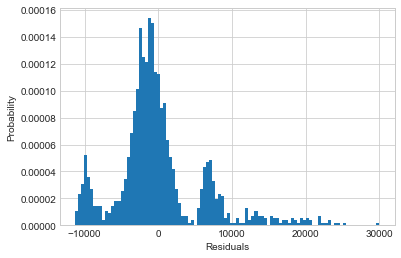

In [27]:
#Plot residuals
plt.hist(e, density=True, bins=100)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Residuals');
plt.savefig("Residuals.png") 

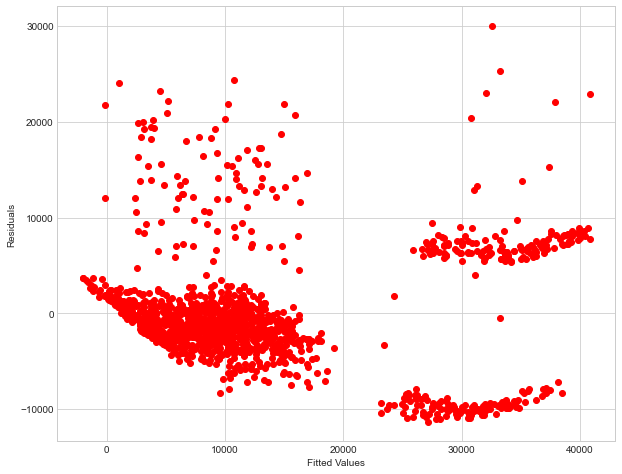

In [28]:
#Plotting residulas versus predicted values
x = theta
y = e
plt.plot(x, y, 'o', color="red")
plt.gcf().set_size_inches(10, 8)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.savefig("Residuals_Fitted.png") 
plt.show()


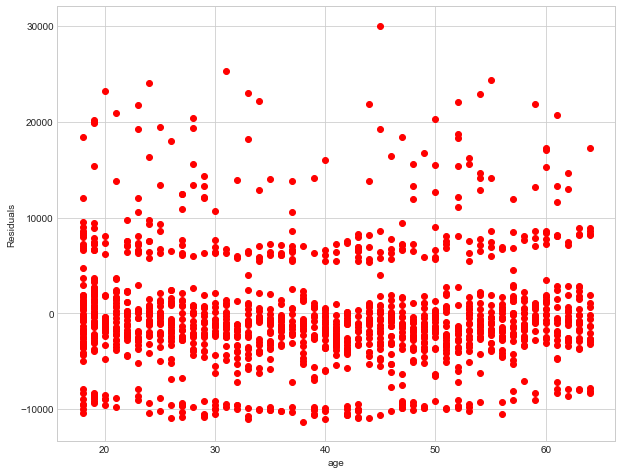

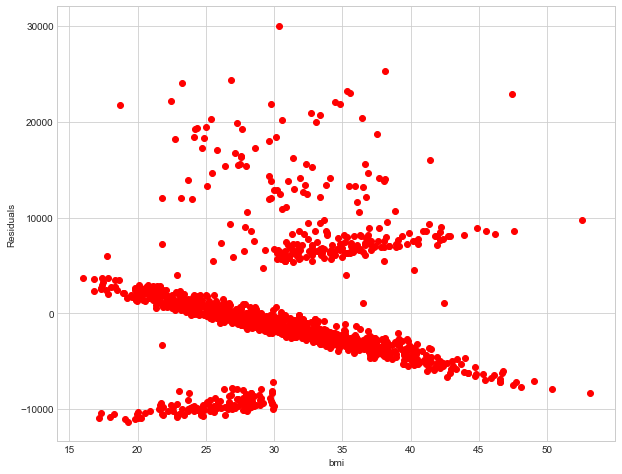

In [29]:
for variable in ["age", "bmi"]:
    x = data[variable]
    y = e
    plt.plot(x, y, 'o', color="red", label=variable)
    plt.gcf().set_size_inches(10, 8)
    #plt.title('Residuals for')
    plt.xlabel(variable)
    plt.ylabel('Residuals')
    name = "Residuals_" + variable + ".png"
    plt.savefig(name) 
    plt.show()
    

## Let's examine the data further...
Because the residuals displayed behavior that wasn’t expected given the assumptions, the data is further analyzed to determine if the reason for the residual behavior can be explained and corrected.  The smoking status appears to have a significant effect on the data as can be seen from the plots above.  Therefore, the dataset is split into two groups based on the smoking status, and a separate model is created for each dataset.

/Users/janaanlake/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Splitting up data based on smoker status:  nonsmoker
(1064, 8)
['intercept', 'age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest', 'southeast']
Beta Hat:
[-3601.62   264.48  -525.97    18.98   587.46  1394.55   846.43   402.51]
The standard error for beta hat:
[865.1   10.1  281.75  24.53 115.71 402.28 398.64 402.35]


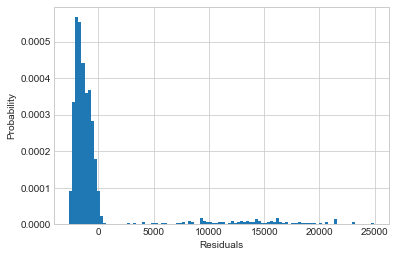

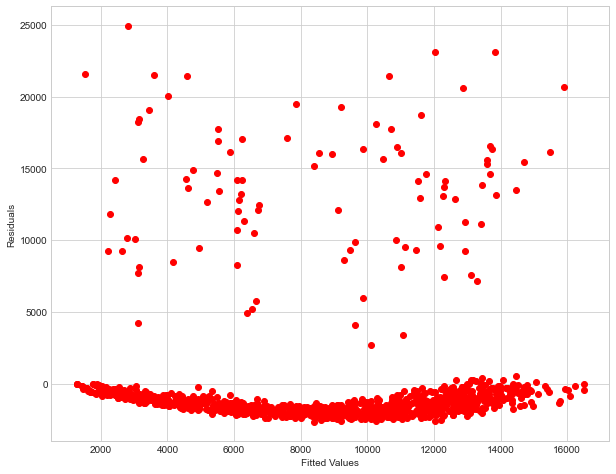

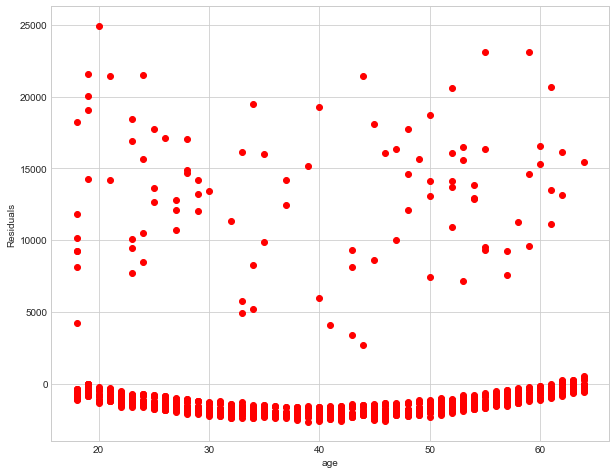

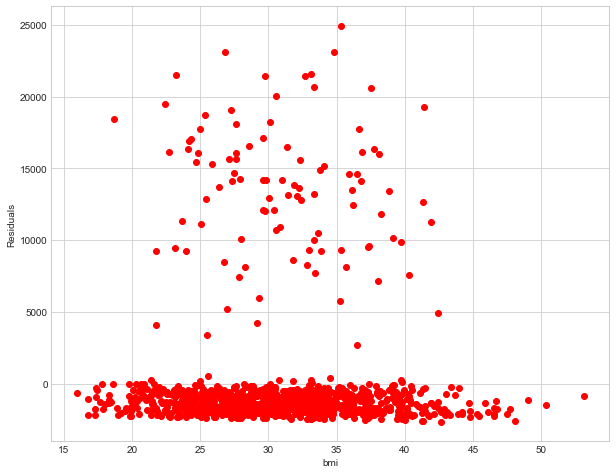

Splitting up data based on smoker status:  smoker
(274, 8)
['intercept', 'age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest', 'southeast']
Beta Hat:
[-23107.65    267.4    -388.12   1475.55    182.74    435.88   -253.83
  -1456.85]
The standard error for beta hat:
[2134.65   25.26  716.88   58.39  304.57 1044.94 1080.63  980.95]


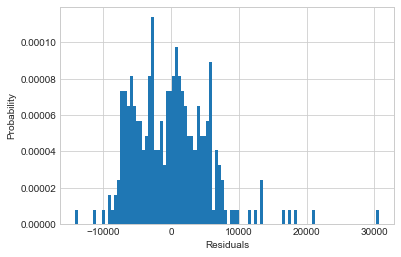

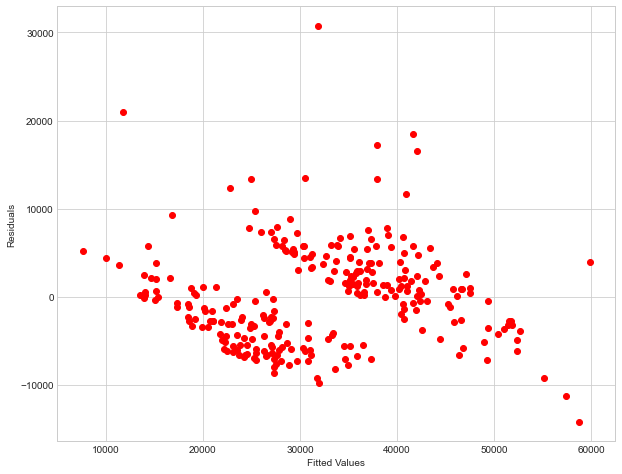

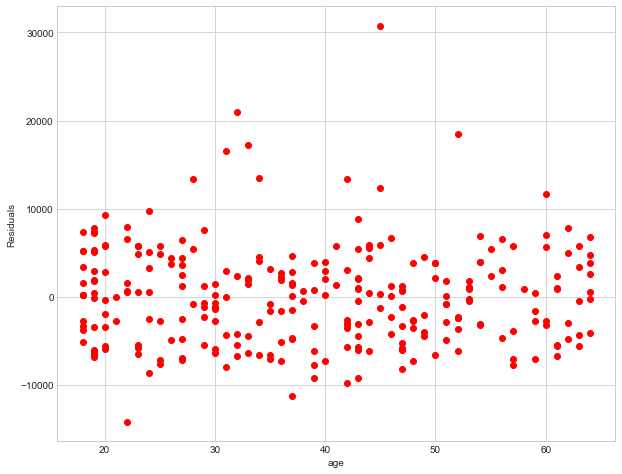

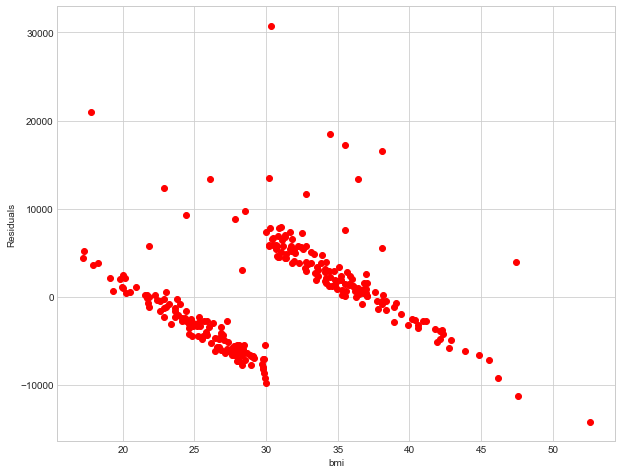

In [30]:
#Split up data by smoker status
nonsmoker = data[data['smoker'] == 0]
nonsmoker.reset_index(drop=True, inplace=True)
nonsmoker.drop('smoker', inplace=True, axis=1)

smoker = data[data['smoker'] == 1]
smoker.drop('smoker', inplace=True, axis=1)
smoker.reset_index(drop=True, inplace=True)


for status, dataset in [("nonsmoker", nonsmoker), ("smoker", smoker)]:
    Y = dataset['charges'].to_numpy()
    X = dataset.to_numpy()
    X = X[:,:-1]
    print("Splitting up data based on smoker status:  {}".format(status))
    print(X.shape)

    beta = np.dot(np.dot(LA.inv(np.dot(X.T,X)),X.T),Y.T)
    regressors_nonsmoker = ["intercept", "age", "sex", "bmi", "children", "northeast", "northwest", "southeast"]
    print(regressors)
    print("Beta Hat:")
    print(beta)
    theta = np.dot(X, beta)
    e = Y - theta
    S_squared  = LA.norm(e) ** 2/(X.shape[0] - X.shape[1])
    beta_var = S_squared * LA.inv(np.dot(X.T,X))
    beta_std = np.sqrt(np.diag(beta_var))
    print("The standard error for beta hat:")
    print(beta_std)

    #Plot residuals
    plt.hist(e, density=True, bins=100)  # density=False would make counts
    plt.ylabel('Probability')
    plt.xlabel('Residuals')
    plt.savefig("Residuals_{}.png".format(status)) 
    plt.show()

    x = theta
    y = e
    plt.plot(x, y, 'o', color="red", label=variable)
    plt.gcf().set_size_inches(10, 8)
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.savefig("Residuals_Fitted_{}.png".format(status)) 
    plt.show()

    for variable in ["age", "bmi"]:
        x = dataset[variable]
        y = e
        plt.plot(x, y, 'o', color="red", label=variable)
        plt.gcf().set_size_inches(10, 8)
        #plt.title('Residuals for')
        plt.xlabel(variable)
        plt.ylabel('Residuals')
        plt.savefig("Residuals_{}_{}.png".format(variable,status)) 
        plt.show()



## Let's add another parameter to the smoking dataset 
As can be seen above, the residuals appear to have a bimodal distribution for the smoker status.  Further examination shows a distinct difference in the residuals at a BMI of 30.  Therefore, an additional parameter is added to the smoker dataset.  This additional parameter is an indicator variable where a 0 value indicates a BMI level less than 30 and a value of 1 indicates a BMI value greater than or equal to 30.  

/Users/janaanlake/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


   intercept  age  sex    bmi  bmilevel  children  northeast  northwest  \
0          1   19    0  27.90         0         0          0          0   
1          1   62    0  26.29         0         0          0          0   
2          1   27    1  42.13         1         0          0          0   
3          1   30    1  35.30         1         0          0          0   
4          1   34    0  31.92         1         1          1          0   

   southeast     charges  
0          0  16884.9240  
1          1  27808.7251  
2          1  39611.7577  
3          0  36837.4670  
4          0  37701.8768  
(274, 9)
['intercept', 'age', 'sex', 'bmi', 'children', 'smoker', 'northeast', 'northwest', 'southeast']
Beta Hat:
[-1982.78   264.04  -502.14   508.32 14908.53   234.04   626.93  1018.66
    79.54]
The standard error for beta hat:
[1749.33   16.24  460.8    62.27  765.89  195.77  671.69  697.62  635.41]


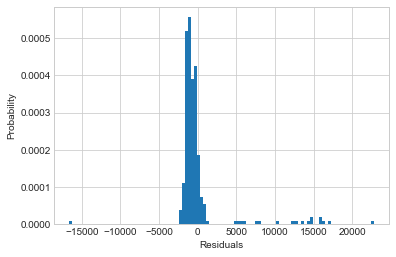

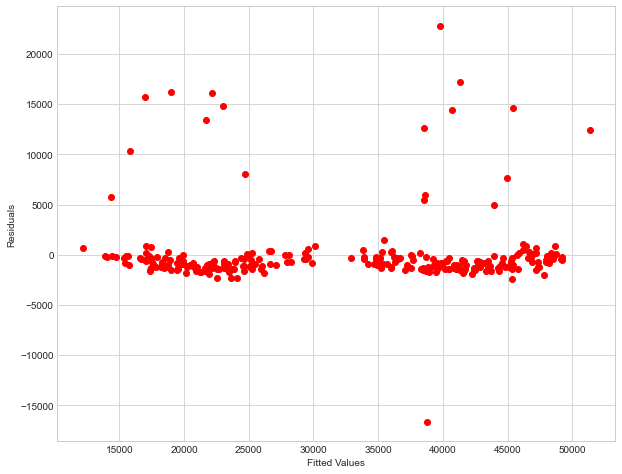

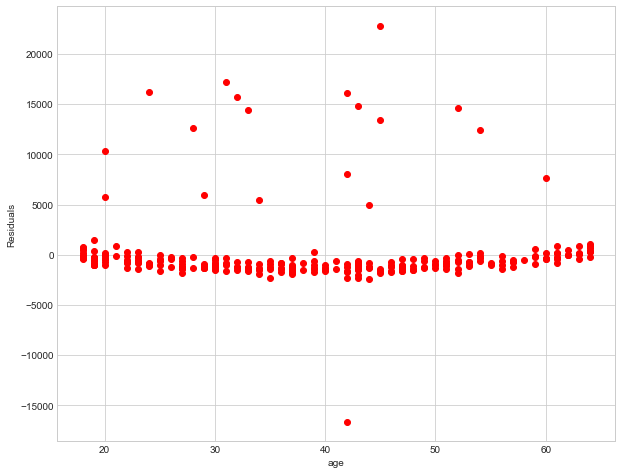

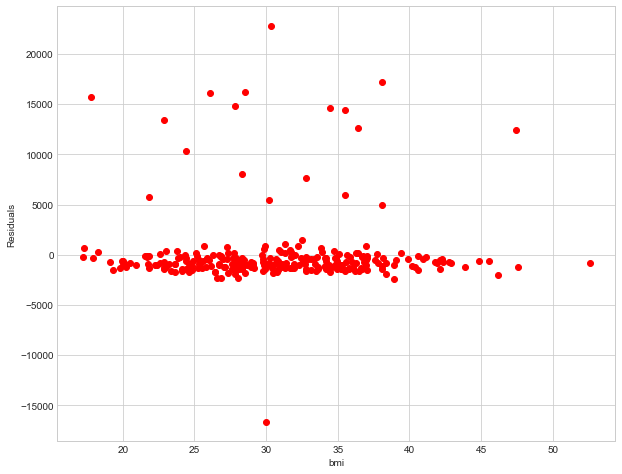

In [31]:
#Add column based on BMI level (<30 and >=30)

def categorise(row):  
    if row['bmi'] >= 30:
        return 1
    else:
        return 0

smoker['bmilevel'] = smoker.apply(lambda row: categorise(row), axis=1)
columns_titles = ["intercept", "age", "sex", "bmi", "bmilevel", "children", "northeast", "northwest", "southeast","charges"]
smoker=smoker.reindex(columns=columns_titles)
print(smoker.head())

Y = smoker['charges'].to_numpy()
X = smoker.to_numpy()
X = X[:,:-1]
print(X.shape)

beta = np.dot(np.dot(LA.inv(np.dot(X.T,X)),X.T),Y.T)
regressors_smoker = ["intercept", "age", "sex", "bmi", "bmilevel", "children", "northeast", "northwest", "southeast"]
print(regressors)
print("Beta Hat:")
print(beta)
theta = np.dot(X, beta)
e = Y - theta
S_squared  = np.dot(e.T,e)/(X.shape[0] - X.shape[1])
beta_var = S_squared * LA.inv(np.dot(X.T,X))
beta_std = np.sqrt(np.diag(beta_var))
print("The standard error for beta hat:")
print(beta_std)

#Plot residuals
plt.hist(e, density=True, bins=100)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Residuals')
plt.savefig("Residuals_smoker_bmi.png") 
plt.show()

x = theta
y = e
plt.plot(x, y, 'o', color="red")
plt.gcf().set_size_inches(10, 8)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.savefig("Residuals_Fitted_smoker_bmi.png") 
plt.show()

for variable in ["age", "bmi"]:
    x = dataset[variable]
    y = e
    plt.plot(x, y, 'o', color="red")
    plt.gcf().set_size_inches(10, 8)
    #plt.title('Residuals for')
    plt.xlabel(variable)
    plt.ylabel('Residuals')
    plt.savefig("Residuals_{}_smoker_bmi.png".format(variable)) 
    plt.show()


## Outlier Detection
The long tails in the distributions suggest that there may be outliers in the dataset. An outlier is a point with a large residual. An influential point is a point that has a large impact on the regression. Outliers that are not high-leverage points do not have a very strong influence on the fitted regression plane unless they are very large. The situation is different when outliers are also high-leverage points. To detect outliers, a studentized residual was used. A studentized residual is the quotient resulting from the division of a residual by an estimate of its standard deviation. The following formula was used to calculate the studentized residuals:

$$t_i=r_i\left(\frac{n-p-2}{n-p-1-r_i^2}\right)^{1/2}$$

where $𝑟_i$ is the ith standardized residual, $n$ is the number of observations, $p$ is the number of parameters, and $t_i$ is a student’s t distribution with $n-p$ degrees of freedom. 

The standardized residuals are calculated as follows:
$$r_i=\frac{e_i}{\sqrt{MSE\left(1-h_{ii}\right)}}$$

Where $e_i$ is the ith residual and $h_i$ is the ith diagonal of the hat matrix, $X\left(X^\top X\right)^{-1}X^\top$ Any point with a studentized residual greater than the critical value using a very conservative value for $\alpha = 0.001$ is flagged as an outlier.

Cook's distance is a commonly used estimate of the influence of a data point when performing a
least-squares regression analysis. Cook’s distance is calculated as follows:

$$D_i=\left(\frac{r_i^2}{p+1}\right)\left(\frac{h_{ii}}{1-h_{ii}}\right)$$

If a point has a Cook’s distance > 1, it is typically considered a high-leverage point. 

In [32]:
alpha = 0.001

for status, dataset in [("nonsmoker", nonsmoker), ("smoker", smoker)]:
    
    #Calculate standardized residuals
    Y = dataset['charges'].to_numpy()
    X = dataset.to_numpy()
    X = X[:,:-1]
    n = len(dataset)
    p = X.shape[1]
    H = np.dot(np.dot(X, LA.inv(np.dot(X.T,X))),X.T)
    beta = np.dot(np.dot(LA.inv(np.dot(X.T,X)),X.T),Y.T)
    theta = np.dot(X, beta)
    e = Y - theta
    MSE = np.dot(e.T,e)/(n-p)
    s_residuals = np.zeros(len(e))
    for i, e_i in enumerate(e):
        h_ii = H[i][i]
        s_i = e_i / (MSE*(1-h_ii))**(1/2)
        s_residuals[i] = s_i
    
    #Calculate studentized residuals and Cook's distance
    t_residuals = np.zeros(len(e))
    c_distance = np.zeros(len(e))
    t_critical_value = scipy.stats.t.ppf(q=1-alpha,df=n-p-2)

    outliers = []
    influencers = []
    for i, s_i in enumerate(s_residuals):
        t_i = s_i * ((n - p - 2) / (n - p - 1 - s_i**2))**(1/2)
        if math.isnan(t_i):
            t_i = 0
        t_residuals[i] = t_i
        if abs(t_i) > t_critical_value:
            outliers.append(i)
        h_ii = H[i][i]
        c_i = (s_i**2/(p + 1)) * (h_ii/(1-h_ii))
        if c_i > 1:
            influencers.append(i)
    print("{} outliers were found in the {} dataset".format(len(outliers),status))
    print(outliers)
    dataset.drop(labels=outliers, axis=0, inplace=True)

    print("{} influencers were found in the {} dataset".format(len(influencers),status))
    print(influencers)
    print()
    dataset.drop(labels=influencers, axis=0, inplace=True)

print(len(nonsmoker))
print(len(smoker))

47 outliers were found in the nonsmoker dataset
[2, 8, 46, 75, 85, 106, 172, 190, 223, 233, 246, 259, 274, 299, 309, 335, 347, 369, 408, 412, 417, 429, 458, 481, 510, 528, 551, 558, 647, 703, 752, 768, 773, 793, 809, 812, 819, 824, 831, 882, 905, 912, 955, 964, 967, 1005, 1055]
0 influencers were found in the nonsmoker dataset
[]

12 outliers were found in the smoker dataset
[7, 33, 97, 101, 108, 110, 115, 160, 183, 246, 262, 264]
0 influencers were found in the smoker dataset
[]

1017
262


/Users/janaanlake/anaconda2/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Now let's recalculate the parameters.
47 and 12 outliers were respectively found in the nonsmoker and smoker datasets and were removed, so we will recalculate the parameters of our model with the outliers removed.  

In [33]:
for status, dataset in [("nonsmoker", nonsmoker), ("smoker", smoker)]:

    Y = dataset['charges'].to_numpy()
    X = dataset.to_numpy()
    X = X[:,:-1]
    beta = np.dot(np.dot(LA.inv(np.dot(X.T,X)),X.T),Y.T)
    theta = np.dot(X, beta)
    e = Y - theta
    S_squared  = np.dot(e.T, e)/(X.shape[0] - X.shape[1])
    beta_var = S_squared * LA.inv(np.dot(X.T,X))
    beta_std = np.sqrt(np.diag(beta_var))
    print("Updated paramters for the {} dataset".format(status))
    print("Beta hat:")
    print(beta)
    print("The standard error for beta hat:")
    print(beta_std)
    print()
    print("Other Statistics:")
    print(dataset.mean())


Updated paramters for the nonsmoker dataset
Beta hat:
[-4370.29   265.53  -377.46    23.38   499.33  1041.95   355.3    462.9 ]
The standard error for beta hat:
[503.54   5.9  164.03  14.21  67.04 234.39 232.59 232.77]

Other Statistics:
intercept       1.000000
age            39.380531
sex             0.487709
bmi            30.682262
children        1.084562
northeast       0.238938
northwest       0.246804
southeast       0.260570
charges      7618.509374
dtype: float64
Updated paramters for the smoker dataset
Beta hat:
[-1419.63   264.03  -624.56   473.14 15262.25   388.22    83.32   400.45
  -212.15]
The standard error for beta hat:
[697.63   6.31 181.72  25.03 304.45  76.77 265.2  275.64 250.1 ]

Other Statistics:
intercept        1.000000
age             38.480916
sex              0.576336
bmi             30.682462
bmilevel         0.526718
children         1.133588
northeast        0.244275
northwest        0.209924
southeast        0.335878
charges      31409.570028
dtype: flo

## Hypothesis Testing
Once the outliers are identified and removed, the next step in the regression analysis is to recalculate the parameters and test each of them individually for significance. Each individual parameter is tested using the null hypothesis for each $\beta_i$,

$$H_0:\beta_i=0$$

and the f score is calculated as:
$$f=\frac{\left(\widehat{\beta_i}\right)^2}{S^2d_{ii}}$$

where $d_{ii}$ is the $i^{th}$ element of the diagonal of $\left(X^\top X\right)^{-1}$ and f is a $f(1,n-p)$ distribution.   This test is used because the normality conditions appeared to be met based on the plots of the residuals.  A value of $\alpha = 0.05$ is used.  

In [31]:
#F test for each beta parameter
def f_test(beta_i, i, D, e, n, p, alpha=0.05):
    d_ii = D[i][i]
    F = beta_i**2 / (np.dot(e.T,e)/(n-p) * d_ii)
    F_critical_value = scipy.stats.f.ppf(q=1-alpha, dfn=1, dfd=n-p)
    print("F value {:.3f} and F-critical-value {:.3f}".format(F, F_critical_value))
    p_value = 1- scipy.stats.f.cdf(F, dfn=1, dfd=n-p)
    print("p-value: {:.3f}".format(p_value))
    
#Do F-tests on all variables
for status, regressors, dataset in [("nonsmoker", regressors_nonsmoker, nonsmoker), 
                                    ("smoker", regressors_smoker, smoker)]:
    print("P values for parameters in the {} dataset".format(status))
    Y = dataset['charges'].to_numpy()
    X = dataset.to_numpy()
    X = X[:,:-1]
    beta = np.dot(np.dot(LA.inv(np.dot(X.T,X)),X.T),Y.T)
    theta = np.dot(X, beta)
    e = Y - theta
    D = LA.inv(np.dot(X.T, X))
    n = X.shape[0]
    p = X.shape[1]
    for index, beta_i in enumerate(beta):
        f_test(beta_i, index, D, e, n, p)
        print("Regressor: {}".format(regressors[index]))
    print()
        

P values for parameters in the nonsmoker dataset
F value 75.326 and F-critical-value 3.851
p-value: 0.000
Regressor: intercept
F value 2028.506 and F-critical-value 3.851
p-value: 0.000
Regressor: age
F value 5.295 and F-critical-value 3.851
p-value: 0.022
Regressor: sex
F value 2.706 and F-critical-value 3.851
p-value: 0.100
Regressor: bmi
F value 55.469 and F-critical-value 3.851
p-value: 0.000
Regressor: children
F value 19.761 and F-critical-value 3.851
p-value: 0.000
Regressor: northeast
F value 2.334 and F-critical-value 3.851
p-value: 0.127
Regressor: northwest
F value 3.955 and F-critical-value 3.851
p-value: 0.047
Regressor: southeast

P values for parameters in the smoker dataset
F value 4.141 and F-critical-value 3.878
p-value: 0.043
Regressor: intercept
F value 1751.476 and F-critical-value 3.878
p-value: 0.000
Regressor: age
F value 11.812 and F-critical-value 3.878
p-value: 0.001
Regressor: sex
F value 357.312 and F-critical-value 3.878
p-value: 0.000
Regressor: bmi
F val

## Confidence Intervals for Regression Coefficients

The last step in the regression analysis is to calculate confidence intervals for all of the parameters.  Again, the normality of the error terms is assumed, so the following formula is used for calculating the confidence intervals:

$$\beta_i\pm t_{n-p}\left(\alpha/\left(2\cdot p\right)\right)Sd_{ii}^{1/2}$$

where $d_{ii}$ is the $i^{th}$ element of the diagonal of $\left(X^\top X\right)^{-1}$ and t is a $t(n-p)$ distribution.  Note that the Bonferroni correction is used, and $1-\alpha$ is a lower bound for all the confidence intervals.  We use a value of $\alpha=0.05$. 

In [32]:
for status, regressors, dataset in [("nonsmoker", regressors_nonsmoker, nonsmoker), 
                                   ("smoker", regressors_smoker, smoker)]:
    print("Confidence intervals for parameters in the {} dataset".format(status))
    alpha = 0.05
    Y = dataset['charges'].to_numpy()
    X = dataset.to_numpy()
    X = X[:,:-1]
    beta = np.dot(np.dot(LA.inv(np.dot(X.T,X)),X.T),Y.T)
    theta = np.dot(X, beta)
    e = Y - theta
    n = X.shape[0]
    p = X.shape[1]
    D = LA.inv(np.dot(X.T, X))
    upper_bounds = np.zeros(p)
    lower_bounds = np.zeros(p)
    t_value = scipy.stats.t.ppf(q=1-alpha/(2*p), df=n-p)
    print(regressors)
    print(beta)
    for i, beta_i in enumerate(beta):
        d_ii = D[i][i]
        interval = t_value * np.sqrt(np.dot(e.T,e)/(n-p)) * np.sqrt(d_ii)
        upper_bounds[i] = beta_i + interval
        lower_bounds[i] = beta_i - interval
    print("Upper Bounds:")
    print(upper_bounds)
    print("Lower Bounds:")
    print(lower_bounds)
    print()

Confidence intervals for parameters in the nonsmoker dataset
['intercept', 'age', 'sex', 'bmi', 'children', 'northeast', 'northwest', 'southeast']
[-4370.29   265.53  -377.46    23.38   499.33  1041.95   355.3    462.9 ]
Upper Bounds:
[-2990.52   281.68    72.      62.33   683.04  1684.21   992.62  1100.73]
Lower Bounds:
[-5750.06   249.37  -826.92   -15.57   315.62   399.69  -282.02  -174.93]

Confidence intervals for parameters in the smoker dataset
['intercept', 'age', 'sex', 'bmi', 'bmilevel', 'children', 'northeast', 'northwest', 'southeast']
[-1419.63   264.03  -624.56   473.14 15262.25   388.22    83.32   400.45
  -212.15]
Upper Bounds:
[  531.59   281.67  -116.3    543.14 16113.76   602.93   825.05  1171.41
   487.38]
Lower Bounds:
[-3370.86   246.38 -1132.82   403.13 14410.74   173.51  -658.41  -370.5
  -911.67]



## Bootstrapping methods to estimate confidence intervals of Beta
Bootstrapping is a method of random sampling with replacement.  The bootstrapping approach does not violate or bypass the normality assumptions, but rather it relies on the Central Limit Theorem.  This means that the distribution of the bootstrapped samples is asymptotically normal.

The residual bootstrapping method is used to sample distributions of the variances for the estimated beta values.  These variances are then used to compute confidence intervals for each estimated beta value.  

Recall that the residuals $\hat{\varepsilon}$ are calculated as $Y-X\hat{\beta}$.  The residual bootstrap first generates IID 

$$\widehat{\varepsilon_i,\ast}\ldots\widehat{,{\varepsilon\ast}_n}$$
such that for each $\widehat{\varepsilon_i^\ast}$
$$P\left(\widehat{\varepsilon_i^\ast}=\widehat{\varepsilon_i^\ast}\right)=\frac{1}{n},\ \ \forall n=1,\ldots,n$$
And then a new bootstrap sample 
$$\left(x_1^\ast,y_1^\ast\right),\ldots,\left(x_n^\ast,y_n^\ast\right)$$
Is generated via
$$x_i^\ast=x_i,y_i^\ast=\widehat{\beta_0}+\widehat{\beta_1}x_i\ +,\ldots,\ +\ \widehat{\beta_n}x_n+\widehat{\varepsilon_i^\ast}$$

Namely, the regressor $x_i$ is fixed but a new value of $y_i$ is generated using the fitted regression function and the sampled residual.  This process is repeated M times.

For each bootstrap sample $$\left(x_i^{\ast(l)},y_1^{\ast\left(l\right)}\right),\ldots,\left(x_n^{\ast\left(l\right)},y_n^{\ast\left(l\right)}\right)$$ a linear regression model is fitted, 
leading to a bootstrap estimate of the fitted coefficients $$\widehat{\beta_0^{\ast\left(l\right)}},\widehat{\beta_1^{\ast\left(l\right)}},\ldots,\widehat{\beta_n^{\ast\left(l\right)}}$$
The M bootstrap samples generate M estimates of $\beta_i$:

$$\left(\widehat{\beta_0^{\ast\left(1\right)}},\widehat{\beta_1^{\ast\left(1\right)}},\ldots,\widehat{\beta_n^{\ast\left(1\right)}}\right),\ldots,\left(\widehat{\beta_0^{\ast\left(M\right)}},\widehat{\beta_1^{\ast\left(M\right)}},\ldots,\widehat{\beta_n^{\ast\left(M\right)}}\right)$$

The variance is then estimated by 
$$\widehat{Var_M}\left(\widehat{\beta_i}\right)=\frac{1}{M}\sum_{l=1}^{M}\left(\widehat{\beta_i^{\ast\left(l\right)}}-\bar{\beta_i^\ast}\right)^2,       \bar{\beta_i^\ast}=\sum_{l=1}^{M}\widehat{\beta_i^{\ast\left(l\right)}}$$

The confidence intervals can be constructed as follows:
$$C.I.\left(\beta_i\right)=\widehat{B_i}\pm z_{1-\alpha/(2\ast p)}\sqrt{\widehat{Var_M}\left(\widehat{\beta_i^\ast}\right)}$$

This follows from the fact that the fitted coefficients $\beta_i$ are roughly normally distributed around the true values $\beta_i$.

With the calculations described above, we sampled 10,000 times, using a value for $\alpha\ =\ 0.05$ and a Bonferroni correction.

In [39]:
num_samples = 10000
print("Number of bootstrapping samples: {}".format(num_samples))
for status, regressors, dataset in [("nonsmoker", regressors_nonsmoker, nonsmoker), 
                                    ("smoker", regressors_smoker, smoker)]:
    print("Calculating confidence intervals for parameters in the {} dataset".format(status))
    alpha = 0.05
    Y = dataset['charges'].to_numpy()
    X = dataset.to_numpy()
    X = X[:,:-1]
    beta_hat = np.dot(np.dot(LA.inv(np.dot(X.T,X)),X.T),Y.T)
    theta = np.dot(X, beta_hat)
    e = Y - theta
    n = X.shape[0]
    p = X.shape[1]
    bootstrap_betas = np.empty([num_samples,len(beta_hat)])

    for i in tqdm(range(num_samples)):
        rand_e = np.random.choice(e, size=len(e), replace=True)
        Y_hat = np.dot(X, beta_hat.T)
        Y_hat = Y_hat + rand_e
        beta = np.dot(np.dot(LA.inv(np.dot(X.T,X)),X.T),Y_hat.T)
        bootstrap_betas[i] = beta

    beta_mean = bootstrap_betas.mean(axis=0)
    beta_variances = np.empty([num_samples, len(beta_hat)])
    for i in range(num_samples):
        variance = (bootstrap_betas[i] - beta_mean)**2
        beta_variances[i] = variance

    variances = beta_variances.mean(axis=0)
    z = scipy.stats.norm.ppf(1-alpha/(2*p)) 

    upper_confidence_band = beta_hat + z * np.sqrt(variances)
    lower_confidence_band = beta_hat - z * np.sqrt(variances)
    print(regressors)
    print("Upper confidence band")
    print(upper_confidence_band)
    print("Lower confidence band")
    print(lower_confidence_band)
    print()

Number of bootstrapping samples: 10000
Calculating confidence intervals for parameters in the nonsmoker dataset


100%|██████████| 10000/10000 [00:00<00:00, 13289.60it/s]


['intercept', 'age', 'sex', 'bmi', 'children', 'northeast', 'northwest', 'southeast']
Upper confidence band
[-2996.32   281.6     65.06    62.12   681.33  1679.2    988.78  1097.39]
Lower confidence band
[-5744.27   249.45  -819.98   -15.35   317.33   404.71  -278.18  -171.59]

Calculating confidence intervals for parameters in the smoker dataset


100%|██████████| 10000/10000 [00:00<00:00, 15975.56it/s]

['intercept', 'age', 'sex', 'bmi', 'bmilevel', 'children', 'northeast', 'northwest', 'southeast']
Upper confidence band
[  498.39   281.26  -132.79   541.45 16085.02   597.65   805.39  1161.31
   468.45]
Lower confidence band
[-3337.65   246.79 -1116.33   404.82 14439.48   178.79  -638.75  -360.4
  -892.74]



In [ ]:
from sklearn.linear_model import LinearRegression
data = pd.read_csv("insurance.csv")
data['sex'].replace(['female', 'male'],[0, 1], inplace=True)
data['smoker'].replace(['yes', 'no'],[0, 1], inplace=True)
data['region'].replace(['northeast', 'northwest', 'southeast', 'southwest'],[0,1,2,3], inplace=True)
Y = data['charges'].to_numpy()
X = data.to_numpy()
X = X[:,:-1]
reg = LinearRegression().fit(X, Y)
print(reg.coef_)
print(reg.intercept_)